In [444]:
import pandas as pd
import numpy as np

In [445]:
train = pd.read_csv("train.csv")
test = pd.read_csv("val.csv")
unlabeled = pd.read_csv("unlabeled.csv")

In [446]:
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [447]:
unlabeled[unlabeled == "na"] = np.nan

In [448]:
train = train.sample(frac=1)

In [449]:
test = test.sample(frac=1)

In [450]:
unlabeled = unlabeled.sample(frac=1)

In [451]:
test.isnull().any().any()

False

In [452]:
train[train == "na"] = np.nan

In [453]:
test[test == "na"] = np.nan

In [454]:
test.isnull().any().any()

True

In [455]:
from sklearn.preprocessing import StandardScaler

In [456]:
scaler = StandardScaler()

In [457]:
true = test['class']

In [458]:
train = train.drop(['rowc', 'colc', 'ra', 'dec'], axis=1)

In [459]:
test = test.drop(['rowc', 'colc', 'ra', 'dec'], axis=1)

In [460]:
unlabeled = unlabeled.drop(['rowc', 'colc', 'ra', 'dec'], axis=1)

In [461]:
unlabeled = unlabeled.drop('objid', axis=1)

In [462]:
data = train.iloc[:, 1:39]

In [463]:
y = train.iloc[:, 39]

In [464]:
test.shape

(23333, 40)

In [465]:
data.shape

(30000, 38)

In [466]:
y.shape

(30000,)

In [467]:
data = np.asarray(data)

In [468]:
y = np.asarray(y)

In [469]:
unlabeled = np.asarray(unlabeled)

In [470]:
from sklearn.preprocessing import Imputer

In [471]:
imp = Imputer()

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [472]:
imp.fit(data)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [473]:
data = imp.transform(data)

In [474]:
data_test = test.iloc[:, 1:39]

In [475]:
data_test = imp.transform(data_test)

In [476]:
unlabeled = imp.transform(unlabeled)

In [477]:
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [478]:
data = scaler.transform(data)

In [479]:
data_test = scaler.transform(data_test)

In [480]:
unlabeled = scaler.transform(unlabeled)

In [481]:
from keras.utils.np_utils import to_categorical   

cl = to_categorical(y, num_classes=3)
true1 = to_categorical(true, num_classes=3)

In [483]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
model = Sequential()

model.add(Dense(32,  input_dim=38, activation='relu'))
model.add(Dense(16,  input_dim=38, activation='relu'))
model.add(Dense(3,  activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=[f1])
hist = model.fit(data, cl, epochs=150, batch_size=1000,  validation_data = (data_test, true1))

predictions = np.argmax(model.predict(unlabeled), axis=1)

Train on 30000 samples, validate on 23333 samples
Epoch 1/150
30000/30000 [==============================] - 1s 27us/step - loss: 0.9399 - f1: 0.3701 - val_loss: 0.7815 - val_f1: 0.6091
Epoch 2/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.7591 - f1: 0.6424 - val_loss: 0.6364 - val_f1: 0.7401
Epoch 3/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.6724 - f1: 0.7169 - val_loss: 0.5711 - val_f1: 0.7694
Epoch 4/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.6323 - f1: 0.7434 - val_loss: 0.5499 - val_f1: 0.7801
Epoch 5/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.6107 - f1: 0.7579 - val_loss: 0.5294 - val_f1: 0.7902
Epoch 6/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.5959 - f1: 0.7672 - val_loss: 0.5193 - val_f1: 0.7930
Epoch 7/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.5852 - f1: 0.7729 - val_loss: 0.5062 - val_f1: 0.8007
Epoc

Epoch 61/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.4605 - f1: 0.8298 - val_loss: 0.4344 - val_f1: 0.8426
Epoch 62/150
30000/30000 [==============================] - 0s 7us/step - loss: 0.4594 - f1: 0.8297 - val_loss: 0.4347 - val_f1: 0.8426
Epoch 63/150
30000/30000 [==============================] - 0s 7us/step - loss: 0.4586 - f1: 0.8303 - val_loss: 0.4369 - val_f1: 0.8420
Epoch 64/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.4580 - f1: 0.8296 - val_loss: 0.4410 - val_f1: 0.8405
Epoch 65/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.4578 - f1: 0.8301 - val_loss: 0.4355 - val_f1: 0.8430
Epoch 66/150
30000/30000 [==============================] - 0s 7us/step - loss: 0.4560 - f1: 0.8306 - val_loss: 0.4289 - val_f1: 0.8467
Epoch 67/150
30000/30000 [==============================] - 0s 7us/step - loss: 0.4556 - f1: 0.8307 - val_loss: 0.4292 - val_f1: 0.8464
Epoch 68/150
30000/30000 [======================

30000/30000 [==============================] - 0s 7us/step - loss: 0.4275 - f1: 0.8420 - val_loss: 0.4314 - val_f1: 0.8474
Epoch 122/150
30000/30000 [==============================] - 0s 7us/step - loss: 0.4267 - f1: 0.8422 - val_loss: 0.4367 - val_f1: 0.8454
Epoch 123/150
30000/30000 [==============================] - 0s 7us/step - loss: 0.4270 - f1: 0.8425 - val_loss: 0.4332 - val_f1: 0.8464
Epoch 124/150
30000/30000 [==============================] - 0s 7us/step - loss: 0.4264 - f1: 0.8420 - val_loss: 0.4256 - val_f1: 0.8504
Epoch 125/150
30000/30000 [==============================] - 0s 7us/step - loss: 0.4268 - f1: 0.8424 - val_loss: 0.4352 - val_f1: 0.8457
Epoch 126/150
30000/30000 [==============================] - 0s 7us/step - loss: 0.4262 - f1: 0.8427 - val_loss: 0.4276 - val_f1: 0.8503
Epoch 127/150
30000/30000 [==============================] - 0s 8us/step - loss: 0.4257 - f1: 0.8426 - val_loss: 0.4387 - val_f1: 0.8450
Epoch 128/150
30000/30000 [============================

In [485]:
data2 = np.concatenate((data, unlabeled), axis=0)

In [486]:
data2.shape

(53333, 38)

In [487]:
y2 = np.concatenate((y, predictions))

array([0, 1, 2])

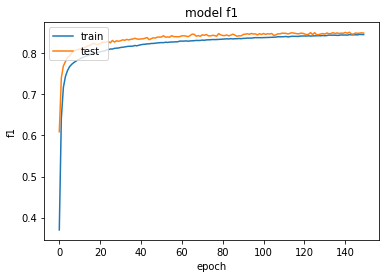

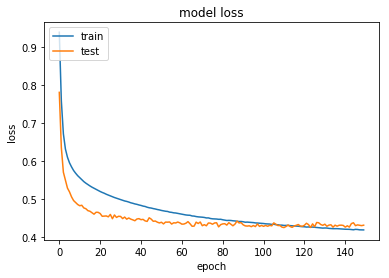

In [484]:
import matplotlib.pyplot as plt
%matplotlib inline

# summarize history for accuracy
plt.plot(hist.history['f1'])
plt.plot(hist.history['val_f1'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [220]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(data, y) 



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [221]:
yhat = clf.predict(data_test)

In [144]:
data1 = np.concatenate((data, unlabeled), axis=0)

In [146]:
y1 = np.concatenate((y, yhat))

In [226]:
from sklearn.naive_bayes import MultinomialNB
gnb = GaussianNB()
yhat = gnb.fit(data, y).predict(data_test)

In [147]:
y1.shape

(53333,)

In [99]:
from sklearn.metrics import f1_score

In [228]:
f1_score(true, yhat, average = "micro")

0.4968070972442463

In [60]:
yhat.shape

(23333,)

In [61]:
true.shape

(23333,)

In [304]:
from sklearn.model_selection import KFold


In [165]:
import lightgbm as lgb

dtrain = lgb.Dataset(data1, label=y1)

In [167]:
bst = lgb.train(parameters, dtrain, num_round)

In [168]:
preds = bst.predict(data_test)

In [176]:
preds

array([[9.69198631e-01, 3.03080876e-02, 4.93281025e-04],
       [9.99976037e-01, 8.39384049e-07, 2.31237062e-05],
       [4.90146453e-02, 8.50417993e-02, 8.65943555e-01],
       ...,
       [2.40709003e-03, 9.94897162e-01, 2.69574762e-03],
       [9.98031950e-01, 1.78429043e-04, 1.78962054e-03],
       [9.99559500e-01, 2.02128217e-04, 2.38372149e-04]])

In [177]:
yhat = np.argmax((preds), axis=1)

In [178]:
yhat

array([0, 0, 2, ..., 1, 0, 0])

In [179]:
f1_score(true, yhat, average = "macro")

0.8596135743538732

In [180]:
unique_elements, counts_elements = np.unique(true, return_counts=True)
np.asarray((unique_elements, counts_elements))

array([[    0,     1,     2],
       [13333,  5000,  5000]])

In [181]:
unique_elements, counts_elements = np.unique(yhat, return_counts=True)
np.asarray((unique_elements, counts_elements))

array([[    0,     1,     2],
       [12883,  5154,  5296]])

In [182]:
train.dtypes

objid      int64
u_0       object
g_0       object
r_0       object
i_0       object
z_0       object
clean      int64
rowv      object
colv      object
u_1      float64
g_1      float64
r_1      float64
i_1      float64
z_1      float64
u_2      float64
g_2      float64
r_2      float64
i_2      float64
z_2      float64
u_3       object
g_3       object
r_3       object
i_3       object
z_3       object
u_4       object
g_4       object
r_4       object
i_4       object
z_4       object
u_5       object
g_5       object
r_5       object
i_5       object
z_5       object
u_6        int64
g_6        int64
r_6        int64
i_6        int64
z_6        int64
class      int64
dtype: object

In [94]:
for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [95]:
X_train.shape

(26667, 38)

In [96]:
X_test.shape

(3333, 38)

In [90]:
y_train.shape

(25000,)

In [91]:
y_test.shape

(5000,)

In [265]:
NFOLDS = 4

In [275]:
train4 = train.shape[0]

In [276]:
train4

30000

In [333]:
data_test

array([[-0.98761863, -1.3848917 ,  0.        , ..., -0.21667578,
        -0.67243707,  0.68525258],
       [ 1.20708368,  0.7804843 ,  1.17892468, ...,  0.26798522,
         0.34085434, -1.10646562],
       [ 1.06078267,  1.41057192,  1.18844152, ...,  0.26798522,
        -0.67243707,  0.08801318],
       ...,
       [ 0.        ,  1.04146433,  1.52722386, ..., -1.18599777,
        -1.68572848,  0.08801318],
       [ 0.        ,  2.20022729,  1.42510559, ...,  0.26798522,
        -1.68572848, -1.10646562],
       [ 0.        , -0.25373598,  0.01967067, ..., -0.21667578,
         1.86079146, -0.50922622]])

In [488]:
SEED = 42

In [489]:
from sklearn.cross_validation import KFold

In [490]:
data=data2
y=y2

In [506]:
ntrain = data.shape[0]
ntest = data_test.shape[0]
NFOLDS = 3
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

class SklearnWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)


class XgbWrapper(object):
    def __init__(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 250)

    def train(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, label=y_train)
        self.gbdt = xgb.train(self.param, dtrain, self.nrounds)

    def predict(self, x):
        return self.gbdt.predict(xgb.DMatrix(x))


def get_oof(clf):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = data[train_index]
        y_tr = y[train_index]
        x_te = data[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(data_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)


In [515]:

et_params = {
    'n_estimators': 100,
    'max_depth': 12,
    'min_samples_leaf': 2
}

rf_params = {
    'n_estimators': 100,
    'max_depth': 15,
    'min_samples_leaf': 2
}

xgb_params = {
    'booster': 'dart',
    'seed': 0,
    'colsample_bytree': 0.8,
    'sample_type': 'weighted',
    'normalize_type':'forest',
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'multi:softmax',
    'max_depth': 10,
    'nrounds': 350,
    'num_class': 3
}

xg = XgbWrapper(seed=SEED, params=xgb_params)
et = SklearnWrapper(clf=ExtraTreesRegressor, seed=SEED, params=et_params)
rf = SklearnWrapper(clf=RandomForestRegressor, seed=SEED, params=rf_params)



array([0., 1., 2.])

In [517]:
x_train = np.concatenate((xg_oof_train, et_oof_train, rf_oof_train), axis=1)
x_test = np.concatenate((xg_oof_test, et_oof_test, rf_oof_test), axis=1)

dtrain = xgb.DMatrix(x_train, label=y)
dtest = xgb.DMatrix(x_test)

xgb_params = {
    'seed': 148,
    'colsample_bytree': 0.8,
    'silent': 1,
    'subsample': 0.6,
    'learning_rate': 0.01,
    'objective': 'multi:softmax',
    'max_depth': 4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'num_class': 3
}




gbdt = xgb.train(xgb_params, dtrain)

yhat = gbdt.predict(dtest)


In [518]:
f1_score(true, yhat, average = "macro")

0.8474961179667423